# Data Acquistion and Initial Exploration

In [ ]:
!pip install pandas

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,normalize
%matplotlib inline
import cufflinks as cf
cf.go_offline()
from scipy import stats

import folium
from folium.plugins import HeatMap
from IPython.display import IFrame

In [ ]:
import pandas as pd


df=pd.read_csv("/content/train.csv")

print('Dataset information:')
print(df.info())

print('\nMissing Values:')
print(df.isnull().sum())

print('\nSummary statistics:')
print(df.describe().T)

print('\nShape:')
print(df.shape)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB
None

Missing Values:
POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA

In [ ]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [ ]:
df.rename(columns={'BHK_NO.':'BHK_NO'},inplace=True)

In [ ]:
df.UNDER_CONSTRUCTION.unique()

array([0, 1])

In [ ]:
df.POSTED_BY.unique()

array(['Owner', 'Dealer', 'Builder'], dtype=object)

In [ ]:
print(df.RERA.unique())
print(df.READY_TO_MOVE.unique())
print(df.RESALE.unique())
print(df.BHK_NO.unique())
print(df.BHK_OR_RK.unique())


[0 1]
[1 0]
[1 0]
[ 2  3  1  4  5  6 12  8 20 10  7  9 13 17 15 11]
['BHK' 'RK']


# Check and remove duplicates

In [ ]:
duplicated_rows=df[df.duplicated()]
print('\n Duplicated Rows:')

print(duplicated_rows)


 Duplicated Rows:
      POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO BHK_OR_RK    SQUARE_FT  \
1904     Dealer                   1     0       3       BHK  1209.628644   
2351     Dealer                   0     0       2       BHK   896.680112   
2611     Dealer                   0     0       3       BHK  1350.256549   
2618     Dealer                   1     0       2       BHK   800.000000   
3211      Owner                   0     0       2       BHK   712.105799   
...         ...                 ...   ...     ...       ...          ...   
29321    Dealer                   0     1       1       BHK   649.641577   
29345    Dealer                   1     1       3       BHK  1563.155686   
29357     Owner                   0     1       3       BHK  1446.201311   
29389   Builder                   1     0       3       BHK   979.290979   
29410    Dealer                   1     0       1       BHK   650.022160   

       READY_TO_MOVE  RESALE                        ADDRESS  LONGITU

In [ ]:
df_no_duplicated=df.drop_duplicates()
df=df_no_duplicated
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29050 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29050 non-null  object 
 1   UNDER_CONSTRUCTION     29050 non-null  int64  
 2   RERA                   29050 non-null  int64  
 3   BHK_NO                 29050 non-null  int64  
 4   BHK_OR_RK              29050 non-null  object 
 5   SQUARE_FT              29050 non-null  float64
 6   READY_TO_MOVE          29050 non-null  int64  
 7   RESALE                 29050 non-null  int64  
 8   ADDRESS                29050 non-null  object 
 9   LONGITUDE              29050 non-null  float64
 10  LATITUDE               29050 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29050 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.9+ MB


In [ ]:
import folium
from folium.vector_layers import CircleMarker
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster


In [ ]:
df.rename(columns={'TARGET(PRICE_IN_LACS)':'Price'},inplace=True)
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,Price
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


#EDA

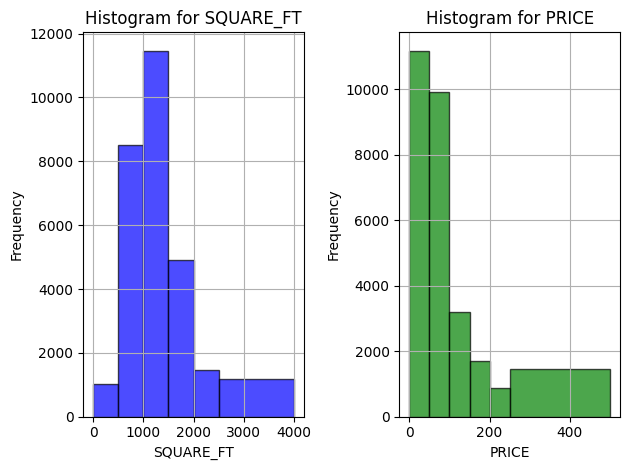

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for SQUARE_FT
custom_bins_sqft = [0, 500, 1000, 1500, 2000, 2500, 4000]  # Update with your desired bin edges
custom_bins_target = [0, 50, 100, 150, 200, 250, 500]  # Update with your desired bin edges

plt.subplot(1, 2, 1)
plt.hist(df['SQUARE_FT'], color='blue',bins=custom_bins_sqft, edgecolor='black', alpha=0.7)
plt.title('Histogram for SQUARE_FT')
plt.xlabel('SQUARE_FT')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for TARGET
plt.subplot(1, 2, 2)
plt.hist(df['Price'], bins=custom_bins_target, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram for PRICE')
plt.xlabel('PRICE')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

Normalize Features. Try Log transformation to see if it work

In [ ]:
import numpy as np

In [ ]:
df['logofprice']=np.log(df['Price'])
df['logofsqft']=np.log(df['SQUARE_FT'])
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,Price,logofprice,logofsqft
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,4.007333,7.170301
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,3.931826,7.150701
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,3.761200,6.838576
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,4.135167,6.835100
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,4.102643,6.906764


Plot transformed features to ensure ditributions are normalized.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

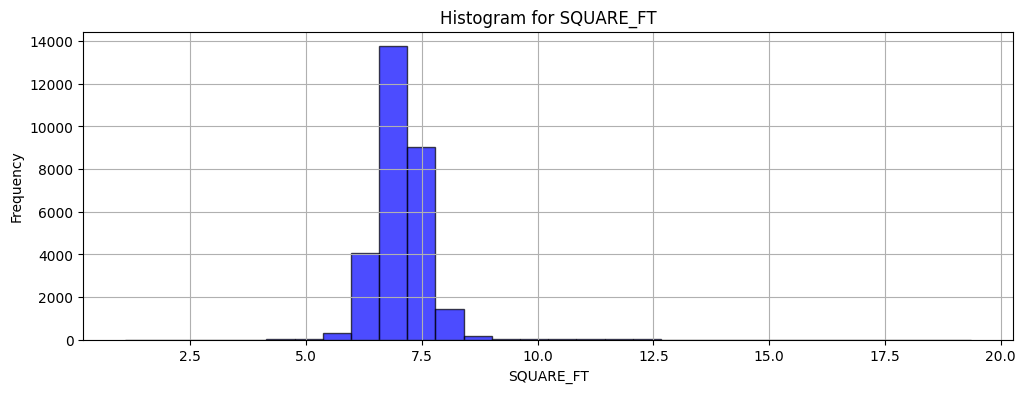

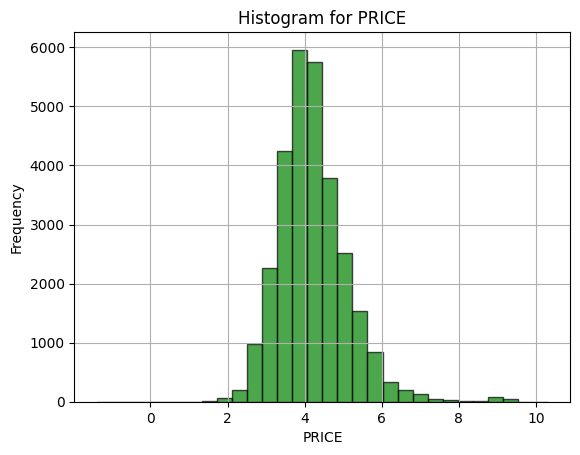

In [ ]:
plt.figure(figsize=(12, 4))
custom_bin_sqrt=[0,500,1000,1500,2000,2500,4000]
custom_bin_price=[0,50,100,150,200,250,500]

#histogam plot for Squareft

plt.hist(df['logofsqft'],bins=30,color='blue',edgecolor='black',alpha=0.7)
plt.title('Histogram for SQUARE_FT')
plt.xlabel('SQUARE_FT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Histogram plot for target

plt.hist(df['logofprice'],bins=30,color='green',edgecolor='black',alpha=0.7)
plt.title('Histogram for PRICE')
plt.xlabel('PRICE')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'Price', 'logofprice', 'logofsqft'],
      dtype='object')

In [ ]:
# Iterate through columns and print value counts
x=['RESALE', 'READY_TO_MOVE', 'BHK_NO', 'RERA', 'UNDER_CONSTRUCTION', 'POSTED_BY']
for i in x:
    print(df[i].value_counts())
    print('\n')


RESALE
1    27027
0     2023
Name: count, dtype: int64


READY_TO_MOVE
1    23851
0     5199
Name: count, dtype: int64


BHK_NO
2     13164
3     10365
1      3540
4      1698
5       189
6        52
7        11
8        10
20        4
10        4
15        4
12        3
9         3
13        1
17        1
11        1
Name: count, dtype: int64


RERA
0    19874
1     9176
Name: count, dtype: int64


UNDER_CONSTRUCTION
0    23851
1     5199
Name: count, dtype: int64


POSTED_BY
Dealer     17961
Owner      10470
Builder      619
Name: count, dtype: int64




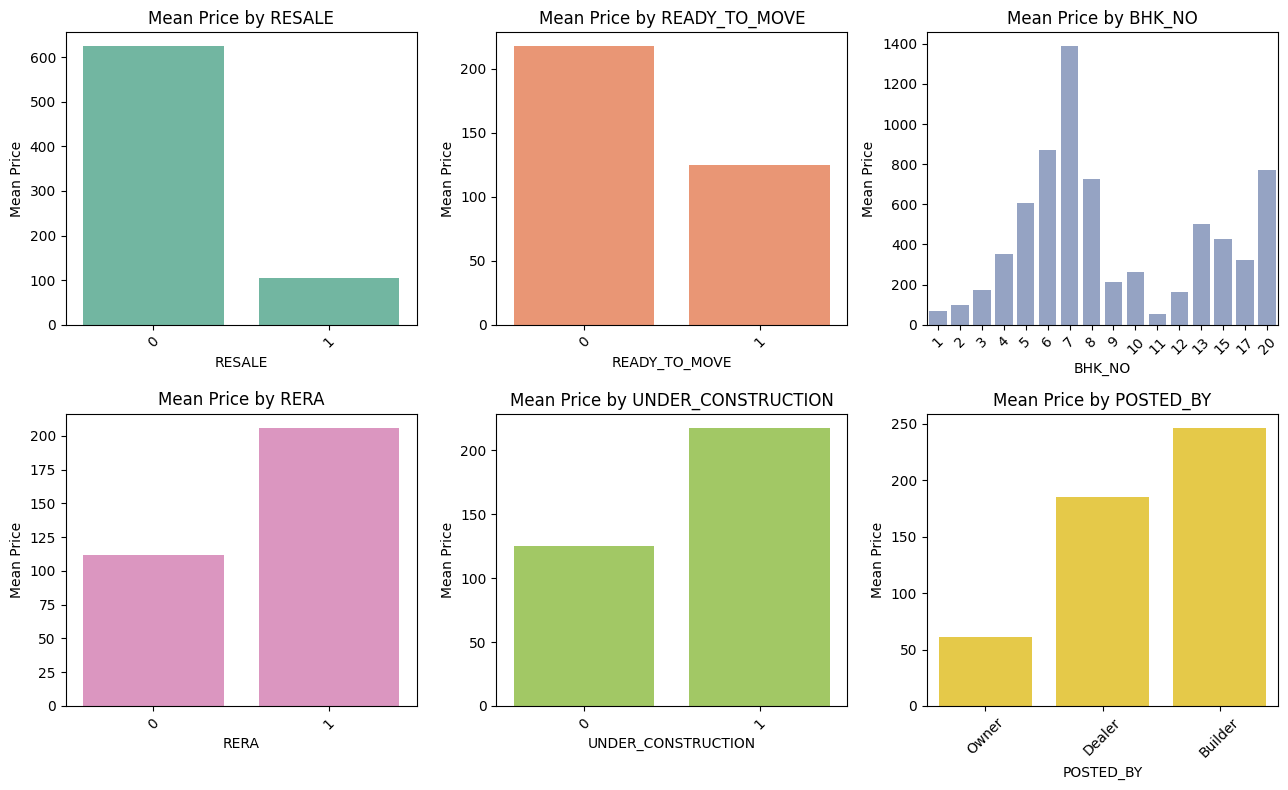

In [ ]:
x_features = ['RESALE', 'READY_TO_MOVE', 'BHK_NO', 'RERA', 'UNDER_CONSTRUCTION', 'POSTED_BY']
# Define colors for each feature
colors = sns.color_palette('Set2', n_colors=len(x_features))
plt.figure(figsize=(13, 8))

# Loop through x features and create bar plots
for index, feature in enumerate(x_features):
    plt.subplot(2, 3, index + 1)  # Create subplot for each feature
    sns.barplot(x=feature, y='Price', data=df, estimator='mean', ci=None,palette=[colors[index]])  # Use barplot and estimator='mean'
    plt.title(f'Mean Price by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Mean Price')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Split the ADDRESS column into city and address parts
df[['address', 'city']] = df['ADDRESS'].str.split(',', n=1, expand=True)

# Drop the original ADDRESS column
df.drop(columns=['ADDRESS'], inplace=True)

# Display the modified DataFrame
df.head()


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Price,logofprice,logofsqft,address,city
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,4.007333,7.170301,Ksfc Layout,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,3.931826,7.150701,Vishweshwara Nagar,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,3.761200,6.838576,Jigani,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,4.135167,6.835100,Sector-1 Vaishali,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,4.102643,6.906764,New Town,Kolkata


In [ ]:

df.drop(columns=['address'], inplace=True)
df.head()



,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Price,logofprice,logofsqft,city
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,4.007333,7.170301,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,3.931826,7.150701,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,3.761200,6.838576,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,4.135167,6.835100,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,4.102643,6.906764,Kolkata


<Axes: xlabel='BHK_OR_RK', ylabel='Price'>

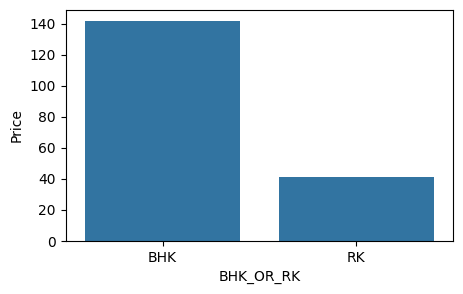

In [ ]:
plt.figure(figsize=(5, 3))

sns.barplot(data=df, x='BHK_OR_RK', y='Price',ci=None,estimator='mean')

In [ ]:
df[['city2','city3']]=df['city'].str.split(',',n=1,expand=True)
df.drop(columns= ['city','city3'],inplace=True)
df['city2'].value_counts()



city2
Bangalore               4251
Lalitpur                2957
Mumbai                  2003
Pune                    1973
Noida                   1716
                        ... 
 ELECTRICITY COLONY        1
Chhindwara                 1
Jivarajpark                1
opp To Nagarjuna Sch       1
 Lake View Recidency       1
Name: count, Length: 433, dtype: int64

In [ ]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Price,logofprice,logofsqft,city2
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,4.007333,7.170301,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,3.931826,7.150701,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,3.761200,6.838576,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,4.135167,6.835100,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,4.102643,6.906764,Kolkata


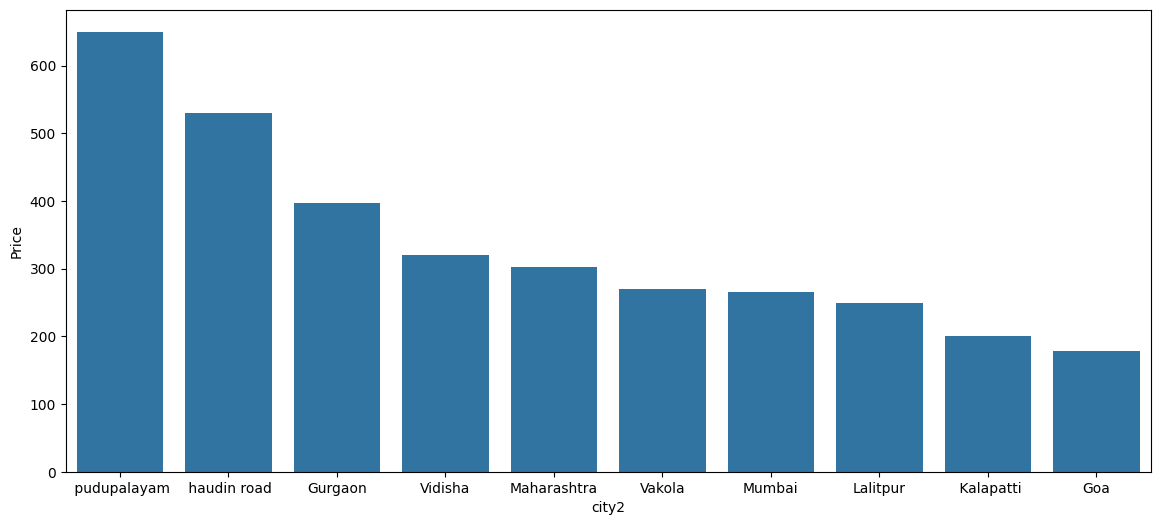

In [ ]:
# Step 1: Calculate mean price for each category in city2
mean_prices = df.groupby('city2')['Price'].mean().reset_index()

# Step 2: Identify top 10 categories based on mean price
top_10_categories = mean_prices.nlargest(10, 'Price')
# Set the size of the bar plot using figsize parameter
plt.figure(figsize=(14, 6))

# Create a bar plot using seaborn (sns)
# Data source: df (assuming df is a pandas DataFrame)
# x-axis: 'city2' column from df
# y-axis: 'Price' column from df
# ci=None: Do not show confidence intervals on the bar plot
# estimator='mean': Use the mean value of 'Price' for each 'city2' category
sns.barplot(data=top_10_categories, x='city2', y='Price', ci=None, estimator='mean')
plt.show()


Feature Engineering - Prep for model fitting

In [ ]:
one_hoted_encoded=pd.get_dummies(df['POSTED_BY'],prefix='coded',drop_first=True)
df_encoded=pd.concat([df,one_hoted_encoded],axis=1)
df_encoded.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Price,logofprice,logofsqft,city2,coded_Dealer,coded_Owner
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,4.007333,7.170301,Bangalore,False,True
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,3.931826,7.150701,Mysore,True,False
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,3.761200,6.838576,Bangalore,False,True
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,4.135167,6.835100,Ghaziabad,False,True
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,4.102643,6.906764,Kolkata,True,False


In [ ]:
label_encoder=LabelEncoder()
df_encoded['BHK_OR_RK_en']=label_encoder.fit_transform(df_encoded['BHK_OR_RK'])
df_encoded.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Price,logofprice,logofsqft,city2,coded_Dealer,coded_Owner,BHK_OR_RK_en
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,4.007333,7.170301,Bangalore,False,True,0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,3.931826,7.150701,Mysore,True,False,0
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,3.761200,6.838576,Bangalore,False,True,0
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,4.135167,6.835100,Ghaziabad,False,True,0
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,4.102643,6.906764,Kolkata,True,False,0


In [ ]:
df_encoded.drop(columns=['POSTED_BY','BHK_OR_RK'],inplace=True)
df_encoded.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Price,logofprice,logofsqft,city2,coded_Dealer,coded_Owner,BHK_OR_RK_en
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,4.007333,7.170301,Bangalore,False,True,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,3.931826,7.150701,Mysore,True,False,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,3.761200,6.838576,Bangalore,False,True,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,4.135167,6.835100,Ghaziabad,False,True,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,4.102643,6.906764,Kolkata,True,False,0


In [ ]:
pip install category_encoders


In [ ]:
from category_encoders import TargetEncoder

# Initialize and fit the target encoder
#encoder=TargetEncoder()
#df_targetedencoded=encoder.fit_transform(df_encoded['city2'],df_encoded['price'])

df_encoded['city_frequencyenc']=df_encoded['city2'].map(df_encoded['city2'].value_counts(normalize=True))
df_targetencoded=df_encoded
df_targetencoded.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Price,logofprice,logofsqft,city2,coded_Dealer,coded_Owner,BHK_OR_RK_en,city_frequencyenc
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,4.007333,7.170301,Bangalore,False,True,0,0.146334
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,3.931826,7.150701,Mysore,True,False,0,0.001480
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,3.761200,6.838576,Bangalore,False,True,0,0.146334
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,4.135167,6.835100,Ghaziabad,False,True,0,0.036764
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,4.102643,6.906764,Kolkata,True,False,0,0.057694


In [ ]:
df_encoded.drop(columns=['city2','SQUARE_FT','logofprice'],inplace=True)
df_encoded.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Price,logofsqft,coded_Dealer,coded_Owner,BHK_OR_RK_en,city_frequencyenc
0,0,0,2,1,1,12.969910,77.597960,55.0,7.170301,False,True,0,0.146334
1,0,0,2,1,1,12.274538,76.644605,51.0,7.150701,True,False,0,0.001480
2,0,0,2,1,1,12.778033,77.632191,43.0,6.838576,False,True,0,0.146334
3,0,1,2,1,1,28.642300,77.344500,62.5,6.835100,False,True,0,0.036764
4,1,0,2,0,1,22.592200,88.484911,60.5,6.906764,True,False,0,0.057694


<Axes: xlabel='city2', ylabel='Price'>

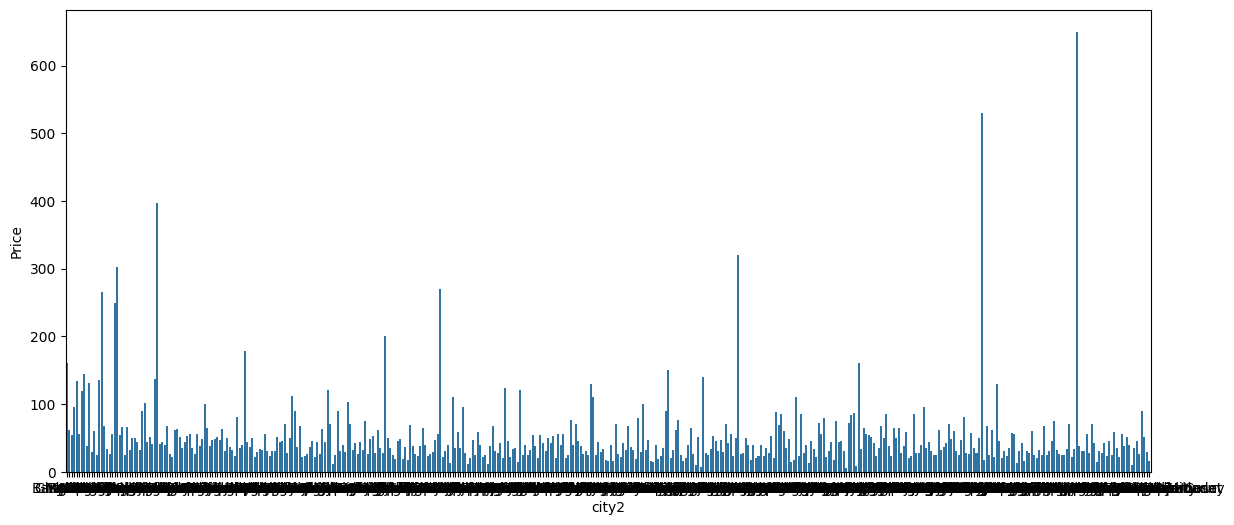

In [ ]:
# Set the size of the bar plot using figsize parameter
plt.figure(figsize=(14, 6))

sns.barplot(data=df, x='city2', y='Price',ci=None,estimator='mean')

In [ ]:
df_encoded

,UNDER_CONSTRUCTION,RERA,BHK_NO,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Price,logofsqft,coded_Dealer,coded_Owner,BHK_OR_RK_en,city_frequencyenc
0,0,0,2,1,1,12.969910,77.597960,55.0,7.170301,False,True,0,0.146334
1,0,0,2,1,1,12.274538,76.644605,51.0,7.150701,True,False,0,0.001480
2,0,0,2,1,1,12.778033,77.632191,43.0,6.838576,False,True,0,0.146334
3,0,1,2,1,1,28.642300,77.344500,62.5,6.835100,False,True,0,0.036764
4,1,0,2,0,1,22.592200,88.484911,60.5,6.906764,True,False,0,0.057694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,1,1,27.140626,78.043277,45.0,7.824046,False,True,0,0.002685
29447,0,0,2,1,1,39.945409,-86.150721,16.0,6.645391,False,True,0,0.000034
29448,0,0,2,1,1,26.928785,75.828002,27.1,6.930144,True,False,0,0.032530
29449,0,0,2,1,1,12.900150,80.227910,67.0,6.832039,False,True,0,0.042031


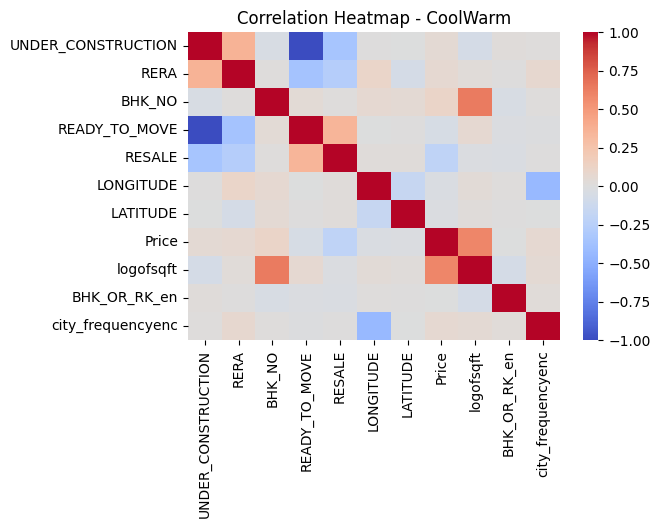

In [ ]:
# 1. Exclude non-numeric columns (assuming 'Owner' is non-numeric)
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
df_numeric = df_encoded[numeric_cols]

# 2. Compute correlation matrix
correlation_matrix = df_numeric.corr()

# 3. Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap - CoolWarm')
plt.show()


Taking Care of outliers

In [ ]:
df_encoded.columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO', 'READY_TO_MOVE', 'RESALE',
       'LONGITUDE', 'LATITUDE', 'Price', 'logofsqft', 'coded_Dealer',
       'coded_Owner', 'BHK_OR_RK_en', 'city_frequencyenc'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt


Number of outliers: 219


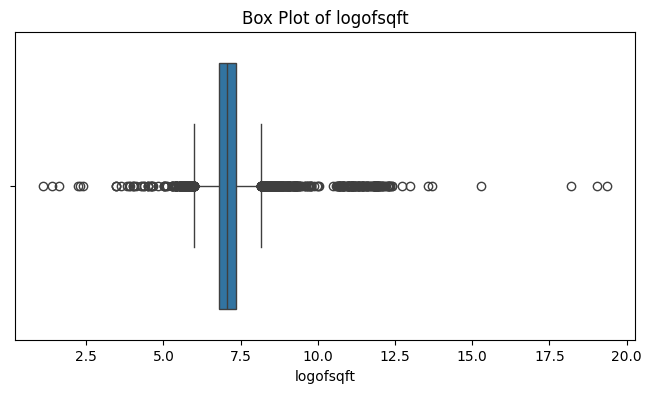

In [ ]:
#calculate the z-score for the 'Square_ft column,
z_score=(df_encoded['logofsqft']-df_encoded['logofsqft'].mean())/df_encoded['logofsqft'].std()
# Define a threshold for outliers (e.g., z-score > 3)
outlier_thershold=3
# Count outliers
outliers_count=(z_score>outlier_thershold).sum()

print('Number of outliers:',outliers_count)
#create a box plot to visualize the distribution
plt.figure(figsize=(8,4))
sns.boxplot(x=df_encoded['logofsqft'])
plt.xlabel('logofsqft')
plt.title('Box Plot of logofsqft')
plt.show()

In [ ]:
# Filter out rows with outliers
filtered_df_encoded = df_encoded[z_score <= outlier_thershold]
filtered_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28831 entries, 0 to 29450
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UNDER_CONSTRUCTION  28831 non-null  int64  
 1   RERA                28831 non-null  int64  
 2   BHK_NO              28831 non-null  int64  
 3   READY_TO_MOVE       28831 non-null  int64  
 4   RESALE              28831 non-null  int64  
 5   LONGITUDE           28831 non-null  float64
 6   LATITUDE            28831 non-null  float64
 7   Price               28831 non-null  float64
 8   logofsqft           28831 non-null  float64
 9   coded_Dealer        28831 non-null  bool   
 10  coded_Owner         28831 non-null  bool   
 11  BHK_OR_RK_en        28831 non-null  int64  
 12  city_frequencyenc   28831 non-null  float64
dtypes: bool(2), float64(5), int64(6)
memory usage: 2.7 MB


In [ ]:
dfmodel=filtered_df_encoded.copy()
dfmodel.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Price,logofsqft,coded_Dealer,coded_Owner,BHK_OR_RK_en,city_frequencyenc
0,0,0,2,1,1,12.969910,77.597960,55.0,7.170301,False,True,0,0.146334
1,0,0,2,1,1,12.274538,76.644605,51.0,7.150701,True,False,0,0.001480
2,0,0,2,1,1,12.778033,77.632191,43.0,6.838576,False,True,0,0.146334
3,0,1,2,1,1,28.642300,77.344500,62.5,6.835100,False,True,0,0.036764
4,1,0,2,0,1,22.592200,88.484911,60.5,6.906764,True,False,0,0.057694


In [ ]:
dfmodel.drop(columns=['UNDER_CONSTRUCTION','coded_Dealer'],inplace=True)
dfmodel.head()

,RERA,BHK_NO,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Price,logofsqft,coded_Owner,BHK_OR_RK_en,city_frequencyenc
0,0,2,1,1,12.969910,77.597960,55.0,7.170301,True,0,0.146334
1,0,2,1,1,12.274538,76.644605,51.0,7.150701,False,0,0.001480
2,0,2,1,1,12.778033,77.632191,43.0,6.838576,True,0,0.146334
3,1,2,1,1,28.642300,77.344500,62.5,6.835100,True,0,0.036764
4,0,2,0,1,22.592200,88.484911,60.5,6.906764,False,0,0.057694


MODEL Training, fine tuning, testing, comparison and feature importance graphs¶


We will run XGBoost and Random Forest, train with best hyperparameters after finetuning, pick the best model and evaluate on the test dataset.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
dfmodel.columns

Index(['RERA', 'BHK_NO', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE',
       'Price', 'logofsqft', 'coded_Owner', 'BHK_OR_RK_en',
       'city_frequencyenc'],
      dtype='object')

In [ ]:

x=dfmodel.drop(columns=['Price','LATITUDE'])
y=dfmodel['Price']
x,y

(       RERA  BHK_NO  READY_TO_MOVE  RESALE  LONGITUDE  logofsqft  coded_Owner  \
 0         0       2              1       1  12.969910   7.170301         True   
 1         0       2              1       1  12.274538   7.150701        False   
 2         0       2              1       1  12.778033   6.838576         True   
 3         1       2              1       1  28.642300   6.835100         True   
 4         0       2              0       1  22.592200   6.906764        False   
 ...     ...     ...            ...     ...        ...        ...          ...   
 29446     0       3              1       1  27.140626   7.824046         True   
 29447     0       2              1       1  39.945409   6.645391         True   
 29448     0       2              1       1  26.928785   6.930144        False   
 29449     0       2              1       1  12.900150   6.832039         True   
 29450     1       2              1       1  26.832353   6.798804        False   
 
        BHK_OR

In [ ]:
# Define features and target
X = dfmodel.drop("Price", axis=1)
y = dfmodel["Price"]

# Split data into train, validation, and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#taking log of target to use a normalized disribution for fitting and predicting
y_train_log=np.log(y_train)

In [ ]:
import pandas as pd

# Convert NumPy array to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Check for NaN values in X_train_scaled_df
nan_columns = X_train_scaled_df.columns[X_train_scaled_df.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)


Columns with NaN values: []


In [ ]:
#Initialize models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Define parameter grids for grid search
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
xgb_param_grid = {
    'n_estimators': [200,300, 400],
    'learning_rate': [0.01, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Perform grid search with 5 fold cross-validation
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='r2',verbose=1)
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='r2',verbose=1)

In [ ]:
import pandas as pd

# Check for NaN values in y_train_log
nan_indices = pd.isna(y_train_log)
print("Indices with NaN values in y_train_log:", nan_indices)


Indices with NaN values in y_train_log: 26076    False
24175    False
6737     False
4965     False
15066    False
         ...  
21987    False
5444     False
867      False
16048    False
24120    False
Name: Price, Length: 20181, dtype: bool


In [ ]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with a strategy (e.g., 'mean', 'median', 'most_frequent')
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on y_train_log
y_train_imputed = imputer.fit_transform(y_train_log.values.reshape(-1, 1))


In [ ]:
# Drop rows with NaN values
y_train_dropna = y_train_log.dropna()


In [ ]:
# Check again for NaN values in y_train_imputed or y_train_dropna
nan_indices_after = pd.isna(y_train_imputed).any()
print("NaN values in y_train_imputed:", nan_indices_after)


NaN values in y_train_imputed: False


In [ ]:
# Assuming rf_grid and xgb_grid are defined as GridSearchCV objects

# Fit GridSearchCV to training data (using cleaned data)
rf_grid.fit(X_train_scaled, y_train_imputed.flatten())
xgb_grid.fit(X_train_scaled, y_train_imputed.flatten())

# Print best parameters for both models
print("Best params for rf model:", rf_grid.best_params_)
print("Best params for xgb model:", xgb_grid.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best params for rf model: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best params for xgb model: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 400, 'subsample': 1.0}


In [ ]:
#Get the best models with optimized hyperparameters
best_rf_model=rf_grid.best_estimator_
best_xgb_model=xgb_grid.best_estimator_

In [ ]:
#Train and predict with best params and print scores for training dataset for random forest

y_pred_train_logrf = best_rf_model.predict(X_train_scaled)

#y_pred_train_log = model.predict(X_train_scaled)
y_pred_transformedbacktonormalrf = np.expm1(y_pred_train_logrf)  # Inverse the log transformation

r2_RF = r2_score(y_train, y_pred_transformedbacktonormalrf)
mse_RF = mean_squared_error(y_train, y_pred_transformedbacktonormalrf)
mae_RF = mean_absolute_error(y_train, y_pred_transformedbacktonormalrf)

print("R2 Score of train for rf:", r2_RF)
print("Mean Squared Error of train for rf:", mse_RF)
print("Mean Absolute Error of train for rf:", mae_RF)

R2 Score of train for rf: 0.8781315593127446
Mean Squared Error of train for rf: 3043.3191102602577
Mean Absolute Error of train for rf: 12.822065256432241


In [ ]:
#Train and predict with best params and print scores for training dataset for xgb

y_pred_train_logxgb = best_xgb_model.predict(X_train_scaled)

#y_pred_train_log = model.predict(X_train_scaled)
y_pred_transformedbacktonormalxgb = np.expm1(y_pred_train_logxgb)  # Inverse the log transformation

r2_xgb = r2_score(y_train, y_pred_transformedbacktonormalxgb)
mse_xgb = mean_squared_error(y_train, y_pred_transformedbacktonormalxgb)
mae_xgb = mean_absolute_error(y_train, y_pred_transformedbacktonormalxgb)

print("R2 Score of train for xgb:", r2_xgb)
print("Mean Squared Error of train for xgb:", mse_xgb)
print("Mean Absolute Error of train for xgb:", mae_xgb)

R2 Score of train for xgb: 0.8821615061364265
Mean Squared Error of train for xgb: 2942.6826032804265
Mean Absolute Error of train for xgb: 17.287502479746976


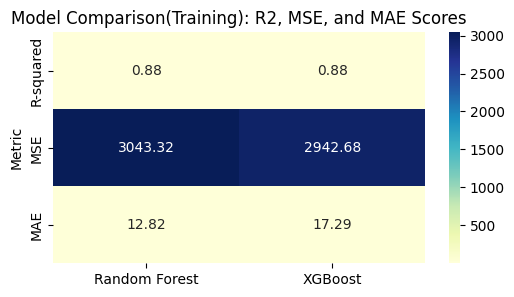

In [ ]:

#Compare R-squared, MSE, and MAE scores on both trained models with best params

scores = {
    "Metric": ["R-squared", "MSE", "MAE"],
    "Random Forest": [r2_RF, mse_RF, mae_RF],
    "XGBoost": [r2_xgb, mse_xgb, mae_xgb]
}

# Convert scores dictionary to DataFrame
scores_df = pd.DataFrame(scores)

# Set the "Metric" column as the index
scores_df.set_index("Metric", inplace=True)

# Create a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(scores_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Model Comparison(Training): R2, MSE, and MAE Scores")
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Select the model with the best training metrics after fine tuning and evaluate on the test set

y_pred_test_logxgb = best_xgb_model.predict(X_test_scaled)

#y_pred_train_log = model.predict(X_train_scaled)
y_predtest_transformedbacktonormalxgb = np.expm1(y_pred_test_logxgb)  # Inverse the log transformation

r2_xgbtest = r2_score(y_test, y_predtest_transformedbacktonormalxgb)
mse_xgbtest = mean_squared_error(y_test, y_predtest_transformedbacktonormalxgb)
mae_xgbtest = mean_absolute_error(y_test, y_predtest_transformedbacktonormalxgb)

print("R2 Score of train for xgb:", r2_xgbtest)
print("Mean Squared Error of train for xgb:", mse_xgbtest)
print("Mean Absolute Error of train for xgb:", mae_xgbtest)

R2 Score of train for xgb: 0.7730460485729842
Mean Squared Error of train for xgb: 8502.142062187942
Mean Absolute Error of train for xgb: 24.061603078661904


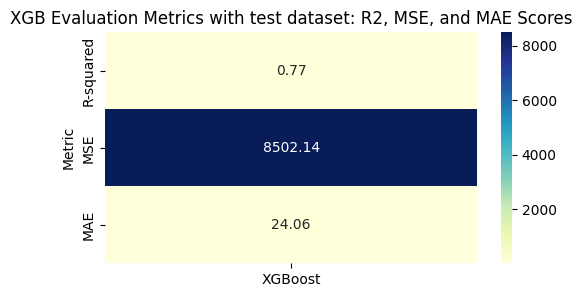

In [ ]:
# Show test results on a heatmap for xgb

scores = {
    "Metric": ["R-squared", "MSE", "MAE"],
    "XGBoost": [r2_xgbtest, mse_xgbtest, mae_xgbtest]
}

# Convert scores dictionary to DataFrame
scores_df = pd.DataFrame(scores)

# Set the "Metric" column as the index
scores_df.set_index("Metric", inplace=True)

# Create a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(scores_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("XGB Evaluation Metrics with test dataset: R2, MSE, and MAE Scores")
plt.xticks(rotation=0)
plt.show()

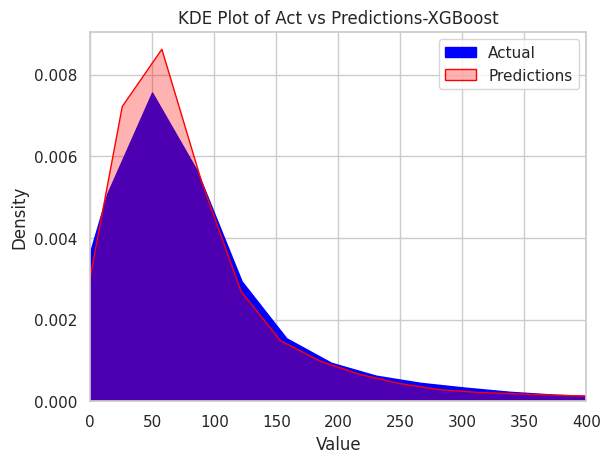

In [ ]:
# Plot KDE plots - Actual vs Pred
sns.set(style="whitegrid")

sns.kdeplot(y_test, fill=True, color="blue", label='Actual', alpha=1)
sns.kdeplot(y_predtest_transformedbacktonormalxgb, fill=True, color="red", label='Predictions', alpha=0.3)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE Plot of Act vs Predictions-XGBoost')
plt.legend()

# Set x-axis limits to zoom in
plt.xlim(0, 400)  # Adjust the limits as needed
plt.show()

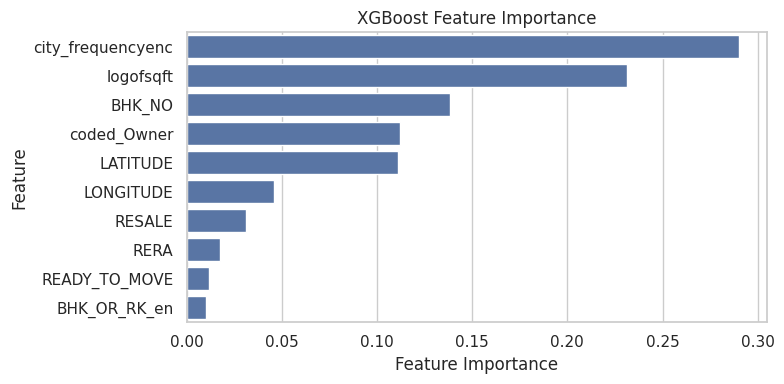

In [ ]:
# Get feature importances and Plot on a graph
#best_xgb_model = xgb_grid.best_estimator_
best_xgb_model.fit(X_train_scaled, y_train_log)

feature_importances = best_xgb_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort indices based on feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Reorder importances and feature names
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a bar plot for feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x=sorted_importances, y=sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()